<a href="https://colab.research.google.com/github/wairiukoirwine/ML11/blob/main/full_proof_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your dataset (.csv)...


Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (8).csv
Loaded: heart_failure_clinical_records_dataset (8).csv
Columns detected: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

Select X-axis column:
1. age
2. anaemia
3. creatinine_phosphokinase
4. diabetes
5. ejection_fraction
6. high_blood_pressure
7. platelets
8. serum_creatinine
9. serum_sodium
10. sex
11. smoking
12. time
13. DEATH_EVENT
Enter number for X-axis: 1

Select Y-axis column:
1. age
2. anaemia
3. creatinine_phosphokinase
4. diabetes
5. ejection_fraction
6. high_blood_pressure
7. platelets
8. serum_creatinine
9. serum_sodium
10. sex
11. smoking
12. time
13. DEATH_EVENT
Enter number for Y-axis: 4

=== Statistics for age and diabetes ===
              age    diabetes
count  299.000000  299.000000
mean    60.833893    0.418060
std     11.

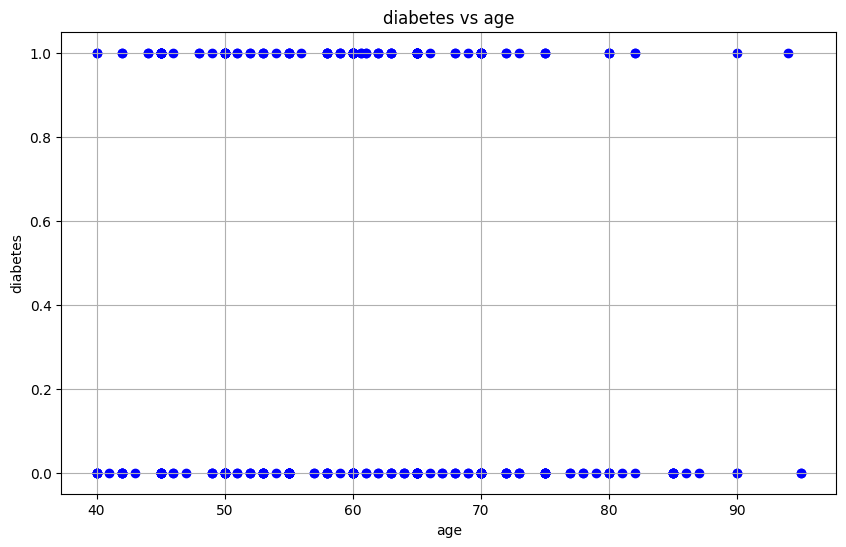

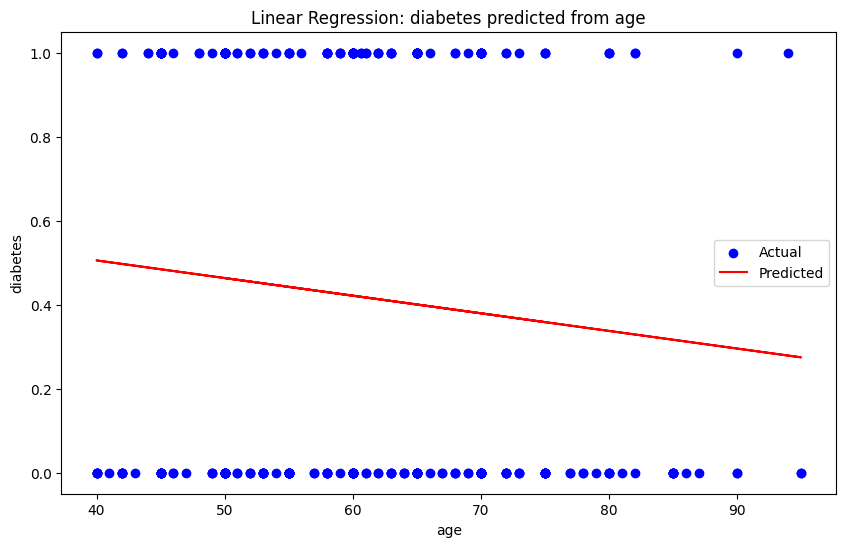

RMSE of prediction: 0.4907


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# ===========================
# 1. Upload CSV
# ===========================
def upload_csv():
    print("Upload your dataset (.csv)...")
    uploaded = files.upload()
    if not uploaded:
        print("No file uploaded.")
        return None
    file_name = list(uploaded.keys())[0]
    df = pd.read_csv(file_name)
    print(f"Loaded: {file_name}")
    print("Columns detected:", list(df.columns))
    return df

df = upload_csv()
if df is None:
    raise Exception("No dataset uploaded.")

# ===========================
# 2. Select numeric columns
# ===========================
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) < 2:
    raise Exception("Need at least two numeric columns for analysis.")

print("\nSelect X-axis column:")
for i, col in enumerate(numeric_cols):
    print(f"{i+1}. {col}")
x_index = int(input("Enter number for X-axis: ")) - 1
x_col = numeric_cols[x_index]

print("\nSelect Y-axis column:")
for i, col in enumerate(numeric_cols):
    print(f"{i+1}. {col}")
y_index = int(input("Enter number for Y-axis: ")) - 1
y_col = numeric_cols[y_index]

# ===========================
# 3. Basic Statistics
# ===========================
print(f"\n=== Statistics for {x_col} and {y_col} ===")
print(df[[x_col, y_col]].describe())

# ===========================
# 4. Plot Column vs Column
# ===========================
plt.figure(figsize=(10, 6))
plt.scatter(df[x_col], df[y_col], color='blue')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"{y_col} vs {x_col}")
plt.grid(True)
plt.show()

# ===========================
# 5. Simple Linear Regression Prediction
# ===========================
X = df[[x_col]]
y = df[y_col]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Linear Regression: {y_col} predicted from {x_col}")
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of prediction: {rmse:.4f}")
